<a href="https://colab.research.google.com/github/NBO2001/atividades_cursos/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers,models

In [2]:
(train_imgs, train_labels), (test_img, test_lables) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_imgs = train_imgs.reshape((60000, 28, 28,1))
train_imgs.shape

(60000, 28, 28, 1)

In [4]:
test_img = test_img.reshape( (10000, 28, 28,1) )
test_img.shape

(10000, 28, 28, 1)

In [5]:
train_imgs, test_img = train_imgs/255.0, test_img/255.0

In [6]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [7]:
model = tf.keras.Sequential()
model.add( layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ) )
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu' ) )
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu' ) )

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(
    x=train_imgs,
    y=train_labels,
    epochs=5,
    validation_data=(test_img, test_lables)
)

Epoch 1/5
1875/1875 [==============================] - 21s 5ms/step - loss: 0.1402 - accuracy: 0.9566 - val_loss: 0.0474 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0775 - val_accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0251 - val_accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0256 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.0271 - val_accuracy: 0.9915


In [24]:
y_true = test_lables
y_pred_probs = model.predict(test_img)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_labels).numpy()

313/313 [==============================] - 1s 2ms/step


In [25]:
con_mat_norm = np.around(con_mat.astype('float32') / con_mat.sum(axis=1)[:,np.newaxis], decimals=2)

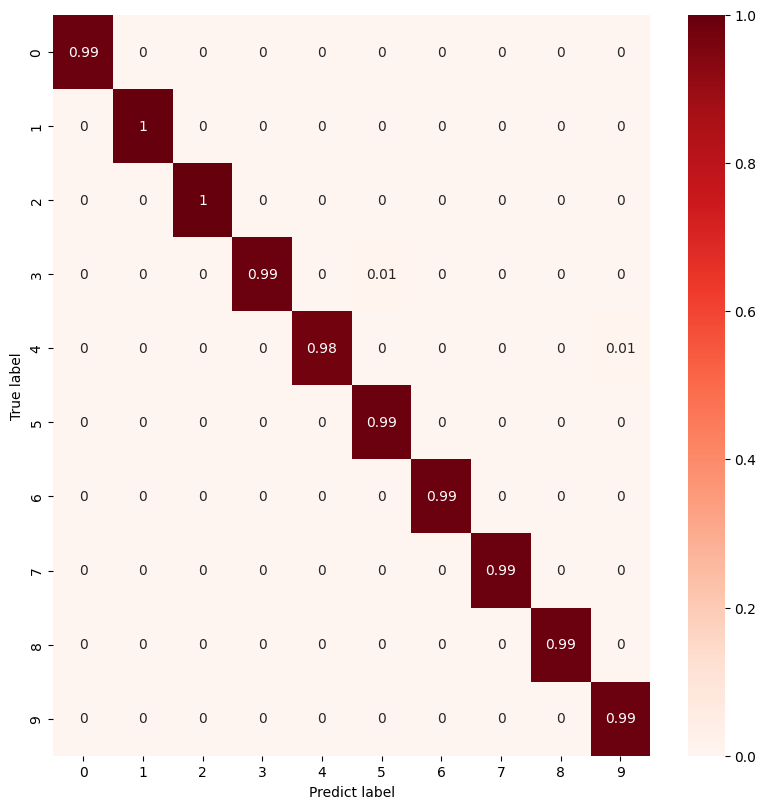

In [27]:
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Reds)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predict label')
plt.show()

In [30]:
con_mat

array([[ 974,    1,    2,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1131,    0,    1,    0,    0,    0,    2,    0,    1],
       [   0,    0, 1030,    0,    0,    0,    0,    2,    0,    0],
       [   0,    1,    1,  997,    0,    7,    0,    4,    0,    0],
       [   0,    0,    0,    0,  967,    0,    2,    0,    2,   11],
       [   0,    1,    0,    2,    0,  886,    1,    1,    1,    0],
       [   3,    2,    2,    0,    0,    3,  948,    0,    0,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1022,    0,    3],
       [   1,    0,    3,    1,    0,    0,    1,    1,  964,    3],
       [   1,    0,    0,    0,    1,    5,    1,    2,    3,  996]],
      dtype=int32)

# Recall

In [33]:
num_classes = con_mat.shape[0]
sensitivities = []

for class_label in range(num_classes):
    TP = con_mat[class_label, class_label]
    FN = np.sum(con_mat[class_label, :]) - TP
    sensitivity = TP / (TP + FN)
    sensitivities.append(sensitivity)

print("Recall for each class:")
for class_label, sensitivity in enumerate(sensitivities):
    print(f"Class {class_label}: {sensitivity}")

Recall for each class:
Class 0: 0.9938775510204082
Class 1: 0.9964757709251101
Class 2: 0.998062015503876
Class 3: 0.9871287128712871
Class 4: 0.984725050916497
Class 5: 0.9932735426008968
Class 6: 0.9895615866388309
Class 7: 0.9941634241245136
Class 8: 0.9897330595482546
Class 9: 0.9871159563924677


# Specificity

In [32]:
num_classes = con_mat.shape[0]
specificities = []

for class_label in range(num_classes):
    TN = np.sum(con_mat) - np.sum(con_mat[class_label, :]) - np.sum(con_mat[:, class_label]) + con_mat[class_label, class_label]
    FP = np.sum(con_mat[:, class_label]) - con_mat[class_label, class_label]
    specificity = TN / (TN + FP)
    specificities.append(specificity)

print("Specificity (True Negative Rate) for each class:")
for class_label, specificity in enumerate(specificities):
    print(f"Class {class_label}: {specificity}")

Specificity (True Negative Rate) for each class:
Class 0: 0.9994456762749445
Class 1: 0.9993231810490694
Class 2: 0.9988849241748439
Class 3: 0.9995550611790879
Class 4: 0.9998891106675538
Class 5: 0.9983530961791831
Class 6: 0.9993364299933643
Class 7: 0.9985510477039679
Class 8: 0.9992244626634168
Class 9: 0.997997997997998


# Accuracy

In [36]:
TP = tf.linalg.diag_part(con_mat)
TN = tf.reduce_sum(con_mat) - tf.reduce_sum(con_mat, axis=0) - tf.reduce_sum(con_mat, axis=1) + TP
total_samples = tf.reduce_sum(con_mat)

accuracy = (tf.reduce_sum(TP) + tf.reduce_sum(TN)) / total_samples

print("Accuracy:", accuracy.numpy())

Accuracy: 9.983


# Precisions

In [37]:
precisions = []

for class_label in range(num_classes):
    TP = con_mat[class_label, class_label]
    FP = np.sum(con_mat[:, class_label]) - TP
    precision = TP / (TP + FP)
    precisions.append(precision)

print("Precision for each class:")
for class_label, precision in enumerate(precisions):
    print(f"Class {class_label}: {precision}")

Precision for each class:
Class 0: 0.9948927477017364
Class 1: 0.9947229551451188
Class 2: 0.9903846153846154
Class 3: 0.996003996003996
Class 4: 0.9989669421487604
Class 5: 0.9833518312985572
Class 6: 0.9937106918238994
Class 7: 0.9874396135265701
Class 8: 0.9927909371781668
Class 9: 0.9822485207100592


In [39]:
# F-Score

In [38]:
f1_scores = []

for class_label in range(num_classes):
    TP = con_mat[class_label, class_label]
    FP = np.sum(con_mat[:, class_label]) - TP
    FN = np.sum(con_mat[class_label, :]) - TP

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)  # Adding a small value to avoid division by zero
    f1_scores.append(f1_score)

print("F1-score for each class:")
for class_label, f1_score in enumerate(f1_scores):
    print(f"Class {class_label}: {f1_score}")

F1-score for each class:
Class 0: 0.994384885250129
Class 1: 0.9955985865492997
Class 2: 0.9942084892085689
Class 3: 0.9915464892815522
Class 4: 0.9917948667951296
Class 5: 0.9882877808339242
Class 6: 0.9916317941632019
Class 7: 0.9907901064881817
Class 8: 0.9912596351028397
Class 9: 0.9846762184305793
